<a href="https://colab.research.google.com/github/AlipGaper/AlipGaper/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%pip install utils
%pip install scikit-learn
%pip install imblearn
%pip install memory_profiler
%pip install TextBlob

import pandas as pd
import utils
import random
import numpy as np
import re
import string
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import lil_matrix
from sklearn.feature_extraction.text import TfidfTransformer

In [97]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Skripsi/kominfo_clean.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
df.shape

(134746, 8)

In [99]:
df.head(10)

,id,time,username,tweet,token,re_stop,stem,join
0,1555912760713629696,21:44:44,masterinternet6,ngak hanya itu yang doyan drakor bajakan atau ...,"['ngak', 'hanya', 'itu', 'yang', 'doyan', 'dra...","['ngak', 'doyan', 'drakor', 'bajakan', 'nyari'...",n g a k d o y a n d r a k o r b a j a ...,n g a k d o y a n d r a k o r b a j a ...
1,1555912746528477184,21:44:40,marahichsan,namanya sebaiknya diganti menjadi ndaktau aja...,"['namanya', 'sebaiknya', 'diganti', 'menjadi',...","['namanya', 'diganti', 'ndaktau', 'aja', 'para...",n a m a g a n t i n d a k t a u a j a ...,n a m a g a n t i n d a k t a u a j a ...
2,1555912439434096641,21:43:27,masterinternet6,humanrights blokirkominfo blokirgakpakemikir,"['humanrights', 'blokirkominfo', 'blokirgakpak...","['humanrights', 'blokirkominfo', 'blokirgakpak...",h u m a n r i g h t s b l o k i r k o m i n ...,h u m a n r i g h t s b l o k i r k o m i n ...
3,1555912327265927168,21:43:00,artama41,nonton tentang makin yakin kalo fosilfosil dis...,"['nonton', 'tentang', 'makin', 'yakin', 'kalo'...","['nonton', 'kalo', 'fosilfosil', 'disana', 'em...",nonton kalo fosilfosil sana emg keluardipecat ...,nonton kalo fosilfosil sana emg keluardipecat ...
4,1555912228892577792,21:42:37,ummuzidni,live react with us sabtu ini seru gess bahas s...,"['live', 'react', 'with', 'us', 'sabtu', 'ini'...","['live', 'react', 'with', 'us', 'sabtu', 'seru...",live react with us sabtu seru gess bahas tweet...,live react with us sabtu seru gess bahas tweet...
5,1555912114572763137,21:42:10,organismemikro,hello as you can see this is an account made t...,"['hello', 'as', 'you', 'can', 'see', 'this', '...","['hello', 'as', 'you', 'can', 'see', 'this', '...",hello as you can see this is an account made t...,hello as you can see this is an account made t...
6,1555912014475669504,21:41:46,masterinternet6,start change it to humanrights blokirkominfo b...,"['start', 'change', 'it', 'to', 'humanrights',...","['start', 'change', 'it', 'to', 'humanrights',...",start change it to humanrights blokirkominfo b...,start change it to humanrights blokirkominfo b...
7,1555911969408155650,21:41:35,zanzoldyck,kominfo kah,"['kominfo', 'kah']","['kominfo', 'kah']",kominfo kah,kominfo kah
8,1555911718739398657,21:40:35,wanderingpadoru,gua nonton kompas tv bicarain soal pse tapi en...,"['gua', 'nonton', 'kompas', 'tv', 'bicarain', ...","['gua', 'nonton', 'kompas', 'tv', 'bicarain', ...",gua nonton kompas tv bicarain pse simplifikasi...,gua nonton kompas tv bicarain pse simplifikasi...
9,1555911432734007297,21:39:27,masterinternet6,true i also just block them humanrights blokir...,"['true', 'i', 'also', 'just', 'block', 'them',...","['true', 'i', 'also', 'just', 'block', 'them',...",true i also just block them humanrights blokir...,true i also just block them humanrights blokir...


In [100]:
df = df.drop([0, 1, 2])

# Tampilkan DataFrame setelah penghapusan
df.head(10)

,id,time,username,tweet,token,re_stop,stem,join
3,1555912327265927168,21:43:00,artama41,nonton tentang makin yakin kalo fosilfosil dis...,"['nonton', 'tentang', 'makin', 'yakin', 'kalo'...","['nonton', 'kalo', 'fosilfosil', 'disana', 'em...",nonton kalo fosilfosil sana emg keluardipecat ...,nonton kalo fosilfosil sana emg keluardipecat ...
4,1555912228892577792,21:42:37,ummuzidni,live react with us sabtu ini seru gess bahas s...,"['live', 'react', 'with', 'us', 'sabtu', 'ini'...","['live', 'react', 'with', 'us', 'sabtu', 'seru...",live react with us sabtu seru gess bahas tweet...,live react with us sabtu seru gess bahas tweet...
5,1555912114572763137,21:42:10,organismemikro,hello as you can see this is an account made t...,"['hello', 'as', 'you', 'can', 'see', 'this', '...","['hello', 'as', 'you', 'can', 'see', 'this', '...",hello as you can see this is an account made t...,hello as you can see this is an account made t...
6,1555912014475669504,21:41:46,masterinternet6,start change it to humanrights blokirkominfo b...,"['start', 'change', 'it', 'to', 'humanrights',...","['start', 'change', 'it', 'to', 'humanrights',...",start change it to humanrights blokirkominfo b...,start change it to humanrights blokirkominfo b...
7,1555911969408155650,21:41:35,zanzoldyck,kominfo kah,"['kominfo', 'kah']","['kominfo', 'kah']",kominfo kah,kominfo kah
8,1555911718739398657,21:40:35,wanderingpadoru,gua nonton kompas tv bicarain soal pse tapi en...,"['gua', 'nonton', 'kompas', 'tv', 'bicarain', ...","['gua', 'nonton', 'kompas', 'tv', 'bicarain', ...",gua nonton kompas tv bicarain pse simplifikasi...,gua nonton kompas tv bicarain pse simplifikasi...
9,1555911432734007297,21:39:27,masterinternet6,true i also just block them humanrights blokir...,"['true', 'i', 'also', 'just', 'block', 'them',...","['true', 'i', 'also', 'just', 'block', 'them',...",true i also just block them humanrights blokir...,true i also just block them humanrights blokir...
10,1555911133709471744,21:38:16,kominfosidrap,bupati sidrap h dollah mando menghadiri haul k...,"['bupati', 'sidrap', 'h', 'dollah', 'mando', '...","['bupati', 'sidrap', 'h', 'dollah', 'mando', '...",bupati sidrap h dol mando hadir haul ke18 anre...,bupati sidrap h dol mando hadir haul ke18 anre...
11,1555911034627837952,21:37:52,dsagaara,halu nya kominfo ngalahin wibu senior,"['halu', 'nya', 'kominfo', 'ngalahin', 'wibu',...","['halu', 'nya', 'kominfo', 'ngalahin', 'wibu',...",halu nya kominfo ngalahin wibu senior,halu nya kominfo ngalahin wibu senior
12,1555910929346621441,21:37:27,dokjametie,pak tolong di blokir aja ini pembohongan publik,"['pak', 'tolong', 'di', 'blokir', 'aja', 'ini'...","['tolong', 'blokir', 'aja', 'pembohongan', 'pu...",tolong blokir aja bohong publik,tolong blokir aja bohong publik


**Labelling Data menggunakan library TextBlob**

Dikarenakan dataset sudah dibersihkan dengan kode terpisah, untuk kode dibawah ini hanya mencakup proses labelling, pembagian dataset dan proses training

keterangan :


0 = **Negatif**

1 = **Netral**

2 = **Positive**

In [101]:
from textblob import TextBlob

def getPolarity(join):
    return TextBlob(join).sentiment.polarity

def analyze(score):
    if score < 0:
        return '0'
    elif score == 0:
        return '1'
    else:
        return '2'

In [102]:
data_bersih = pd.DataFrame(df[['username', 'tweet', 'join']])
data_bersih.head(20)

,username,tweet,join
3,artama41,nonton tentang makin yakin kalo fosilfosil dis...,nonton kalo fosilfosil sana emg keluardipecat ...
4,ummuzidni,live react with us sabtu ini seru gess bahas s...,live react with us sabtu seru gess bahas tweet...
5,organismemikro,hello as you can see this is an account made t...,hello as you can see this is an account made t...
6,masterinternet6,start change it to humanrights blokirkominfo b...,start change it to humanrights blokirkominfo b...
7,zanzoldyck,kominfo kah,kominfo kah
8,wanderingpadoru,gua nonton kompas tv bicarain soal pse tapi en...,gua nonton kompas tv bicarain pse simplifikasi...
9,masterinternet6,true i also just block them humanrights blokir...,true i also just block them humanrights blokir...
10,kominfosidrap,bupati sidrap h dollah mando menghadiri haul k...,bupati sidrap h dol mando hadir haul ke18 anre...
11,dsagaara,halu nya kominfo ngalahin wibu senior,halu nya kominfo ngalahin wibu senior
12,dokjametie,pak tolong di blokir aja ini pembohongan publik,tolong blokir aja bohong publik


In [103]:
print(data_bersih['join'].dtype)
data_bersih['join'] = data_bersih['join'].astype(str)

object


In [104]:
# Hitung polaritas
data_bersih['polarity'] = data_bersih['join'].apply(getPolarity)

# Hitung skor (sesuaikan fungsi analyze sesuai kebutuhan)
data_bersih['score'] = data_bersih['polarity'].apply(analyze)

data_bersih.head(10)


,username,tweet,join,polarity,score
3,artama41,nonton tentang makin yakin kalo fosilfosil dis...,nonton kalo fosilfosil sana emg keluardipecat ...,0.000000,1
4,ummuzidni,live react with us sabtu ini seru gess bahas s...,live react with us sabtu seru gess bahas tweet...,0.136364,2
5,organismemikro,hello as you can see this is an account made t...,hello as you can see this is an account made t...,0.375000,2
6,masterinternet6,start change it to humanrights blokirkominfo b...,start change it to humanrights blokirkominfo b...,0.000000,1
7,zanzoldyck,kominfo kah,kominfo kah,0.000000,1
8,wanderingpadoru,gua nonton kompas tv bicarain soal pse tapi en...,gua nonton kompas tv bicarain pse simplifikasi...,0.000000,1
9,masterinternet6,true i also just block them humanrights blokir...,true i also just block them humanrights blokir...,0.350000,2
10,kominfosidrap,bupati sidrap h dollah mando menghadiri haul k...,bupati sidrap h dol mando hadir haul ke18 anre...,0.000000,1
11,dsagaara,halu nya kominfo ngalahin wibu senior,halu nya kominfo ngalahin wibu senior,0.000000,1
12,dokjametie,pak tolong di blokir aja ini pembohongan publik,tolong blokir aja bohong publik,0.000000,1


**Menampilkan Sample data dari masing masing class**

In [105]:
sample_data = data_bersih.groupby('score').head()

# Menampilkan hanya kolom 'join' dan 'score'
print(sample_data[['join', 'score']])

                                                 join score
3   nonton kalo fosilfosil sana emg keluardipecat ...     1
4   live react with us sabtu seru gess bahas tweet...     2
5   hello as you can see this is an account made t...     2
6   start change it to humanrights blokirkominfo b...     1
7                                         kominfo kah     1
8   gua nonton kompas tv bicarain pse simplifikasi...     1
9   true i also just block them humanrights blokir...     2
10  bupati sidrap h dol mando hadir haul ke18 anre...     1
13  rame nih tagar blokir kominfo eh sob suara gen...     2
16  pikir sekuler warna pemuda ubah lslam live rea...     2
52  iya nih tagar blokirkominfo game online steam ...     0
53  iya nih tagar blokirkominfo game online steam ...     0
54  iya nih tagar blokirkominfo game online steam ...     0
57  iya nih tagar blokirkominfo game online steam ...     0
60  iya nih tagar blokirkominfo game online steam ...     0


In [108]:
data_bersih.score.value_counts()

,count
score,
1,110552
2,13166
0,11025


In [109]:
print(data_bersih.shape)

(134743, 5)


**Undersampling**

Setelah di lakukan pembersihan, terlihat dari output diatas dataset masih sangat tidak seimbang untuk masing masing kelas, hal ini akan menyebabkan masalah saat training data

untuk mengatasi masalah ini, dilakukan undersampling pada dataset agar data masing masing class seimbang

In [111]:
from imblearn.under_sampling import RandomUnderSampler

# Membuat instance RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Melakukan undersampling pada data
X_resampled, y_resampled = rus.fit_resample(data_bersih[['join']], data_bersih['score'])

# Menggabungkan kembali hasilnya ke dalam DataFrame
data_bersih = pd.DataFrame(X_resampled, columns=['join'])
data_bersih['score'] = y_resampled


# Menampilkan jumlah data per kelas setelah penyeimbangan
print(data_bersih['score'].value_counts())

score
0    11025
1    11025
2    11025
Name: count, dtype: int64


In [112]:
sample_data = data_bersih.groupby('score').head()

# Menampilkan hanya kolom 'join' dan 'score'
print(sample_data[['join', 'score']])

                                                     join score
52      iya nih tagar blokirkominfo game online steam ...     0
53      iya nih tagar blokirkominfo game online steam ...     0
54      iya nih tagar blokirkominfo game online steam ...     0
57      iya nih tagar blokirkominfo game online steam ...     0
60      iya nih tagar blokirkominfo game online steam ...     0
64826         tpi emg tai sih bijak kominfo blokirkominfo     1
121898                                   lahh kominfo sih     1
54463                               mood karyawan kominfo     1
119175  kominfo ni gua kaya orang ngetweet delete soon...     1
336     website kek emang satir kominfo deh bang nggak...     1
18610   available petition exist on changedotorg sprea...     2
87903   what the fuck they actually blocked steam and ...     2
19998   detik terima gaji lmao uang hasil tahan rejeki...     2
56116   true sih gua delivery cake kantor lembaga peri...     2
124383  5 artis indonesia heboh tinggal 

In [137]:
vectorizer = TfidfVectorizer(max_features=10000)
vectors = vectorizer.fit_transform(data_bersih['join'])
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
words_df.head()

,00,01,02,03,04,081914361050,10,100,100k,100ml,...,zifamunafik,zivamunafik,zombie,zona,zonaba,zonajajan,zonauang,zoom,zuma,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
X = words_df
y = data_bersih.score

In [139]:
%%time
# Create and train a multinomial naive bayes classifier (MultinomialNB)
bayes = MultinomialNB()
bayes.fit(X, y)

CPU times: user 1.8 s, sys: 362 ms, total: 2.17 s
Wall time: 2.19 s


MultinomialNB()

In [141]:
# Put it through the vectoriser

# transform, not fit_transform, because we already learned all our words
unknown_vectors = vectorizer.transform(data_bersih['join'])
unknown_words_df = pd.DataFrame(unknown_vectors.toarray(), columns=vectorizer.get_feature_names_out())
unknown_words_df.head()

,00,01,02,03,04,081914361050,10,100,100k,100ml,...,zifamunafik,zivamunafik,zombie,zona,zonaba,zonajajan,zonauang,zoom,zuma,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
data_bersih['pred_bayes'] = bayes.predict(unknown_words_df)
data_bersih['pred_bayes_proba'] = bayes.predict_proba(unknown_words_df)[:,1]

Dalam output dibawah ini memunculkan dataframe dari databersih dimana mempunyai 4 kolom yaitu

1. join = text asli yang telah dibersihkan sebelumnya dimana telah melewati berbagai proses meliputi (tokenization, stemming dan stopword)
2. score = Label sentimen pada dataset
3. pred_bayes = Prediksi kelas dari model NB
4. Pred_bayes_prob = Probabilitas prediksi kelas dari model Naive Bayes (accuracy)

In [143]:
data_bersih

,join,score,pred_bayes,pred_bayes_proba
52,iya nih tagar blokirkominfo game online steam ...,0,0,0.015158
53,iya nih tagar blokirkominfo game online steam ...,0,0,0.015158
54,iya nih tagar blokirkominfo game online steam ...,0,0,0.015158
57,iya nih tagar blokirkominfo game online steam ...,0,0,0.015158
60,iya nih tagar blokirkominfo game online steam ...,0,0,0.015158
...,...,...,...,...
5745,kominfo blokir 15 main judi online namanamanya,2,2,0.025846
104393,thank you very much kominfo aja ya google face...,2,2,0.098221
20591,ga percaya audience indo but overseas audience...,2,2,0.004982
9345,kominfo mah anjir hahaha,2,2,0.147360


from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['pred_bayes_proba'].plot(kind='hist', bins=20, title='pred_bayes_proba')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('pred_bayes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='pred_bayes_proba', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['pred_bayes_proba'].plot(kind='line', figsize=(8, 4), title='pred_bayes_proba')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pred_bayes'].value_counts()
    for x_label, grp in _df_23.groupby('score')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('score')
_ = plt.ylabel('pred_bayes')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='score', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['pred_bayes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='pred_bayes', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='pred_bayes_proba', y='score', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['pred_bayes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='pred_bayes_proba', y='pred_bayes', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

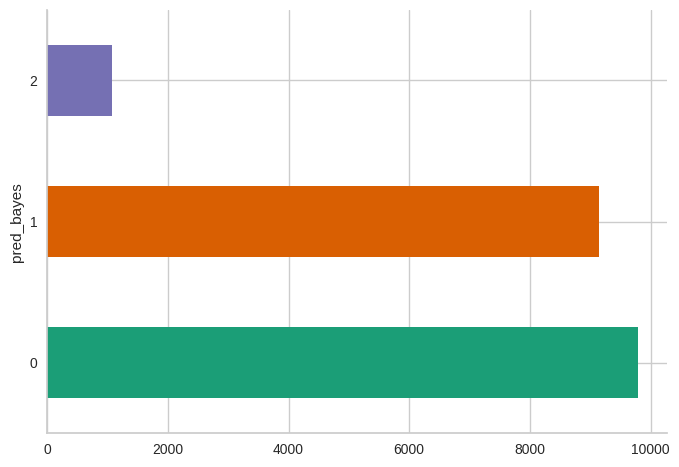

In [157]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('pred_bayes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [146]:
print("Training Naive Bayes")
bayes.fit(X_train, y_train)

Training Naive Bayes


MultinomialNB()

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

**Kesimpulan Output dibawah**
1. Nilai 1772 pada sel baris 'is negative' dan kolom 'Predicted negative' berarti ada 1772 sampel yang sebenarnya berlabel negatif dan juga diprediksi sebagai negatif oleh model.
2. Nilai 218 pada sel baris 'is negative' dan kolom 'Predicted positive' berarti ada 218 sampel yang sebenarnya berlabel negatif tetapi salah diprediksi sebagai positif.

In [152]:
y_true = y_test
bays_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, bays_pred)

label_names = pd.Series(['negative', 'neutral', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted neutral,Predicted positive
Is negative,1772,303,218
Is neutral,145,1854,163
Is positive,266,346,1548


**Tabel Presentase**

Menunjukkan proporsi sampel dalam setiap kelas sebenarnya yang diprediksi dengan benar ke setiap kelas.

Contoh : Nilai 0.772787 pada sel baris 'is negative' dan kolom 'Predicted negative' berarti 77.27% dari sampel yang sebenarnya berlabel negatif diprediksi dengan benar sebagai negatif.

In [153]:
y_true = y_test
bayes_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, bays_pred)

label_names = pd.Series(['negative', 'neutral', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted negative,Predicted neutral,Predicted positive
Is negative,0.772787,0.132141,0.095072
Is neutral,0.067068,0.857539,0.075393
Is positive,0.123148,0.160185,0.716667


In [154]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
print(classification_report(y_test, bayes_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2293
           1       0.74      0.86      0.79      2162
           2       0.80      0.72      0.76      2160

    accuracy                           0.78      6615
   macro avg       0.78      0.78      0.78      6615
weighted avg       0.79      0.78      0.78      6615



**Kesimpulan**

1. Model klasifikasi yang digunakan memiliki kinerja yang cukup baik secara keseluruhan, dengan nilai akurasi sekitar 78%.

2. Model cenderung lebih baik dalam memprediksi kelas 0 dan 1 dibandingkan kelas 2, terlihat dari nilai precision dan recall yang sedikit lebih tinggi pada kelas 0 dan 1.

3. Nilai F1-score yang cukup seimbang menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall.
